In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Import Training data
Evals = {}

Names = ['EvalLSTURIni', 'EvaluationTranformerIniNone', 'EvaluationTranformerOwnIniNone']
Keys = ['LSTUR', 'TransformerIni', 'TransformerIniOwn']
for name,key in zip(Names,Keys):
    filestr = f'TestDemo/{name}.pkl'
    with open(filestr, 'rb') as f:
        file = pickle.load(f)
        Evals[key] = file if type(file) == dict else file[0]





In [2]:
Evals['LSTUR'].keys()

dict_keys(['AUC', 'MRR', 'NDCG5', 'NDCG10', 'loss_vali', 'Loss_training'])

In [3]:
# Get End Scores for each model
EndScores = {'AUC':{}, 'MRR':{}, 'NDCG5':{}, 'NDCG10':{} }#, 'loss_vali':{}}

# Get AUC, MRR, NDCG5, NDCG10, loss_vali
for name in Keys:
    print(name)
    # Get last value of each metric
    EndScores['AUC'][name] = Evals[name]['AUC'][-1]
    EndScores['MRR'][name] = Evals[name]['MRR'][-1]
    EndScores['NDCG5'][name] = Evals[name]['NDCG5'][-1]
    EndScores['NDCG10'][name] = Evals[name]['NDCG10'][-1]
    #EndScores['loss_vali'][name] = Evals[name]['loss_vali'][-1]


LSTUR
TransformerIni
TransformerIniOwn


/var/folders/ky/9z234gb159s813shh1gxh2yw0000gn/T/ipykernel_22963/4103918272.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx].set_xticklabels(['LSTUR-Ini','CTNR-Ini','CTNR-IniLarge'])


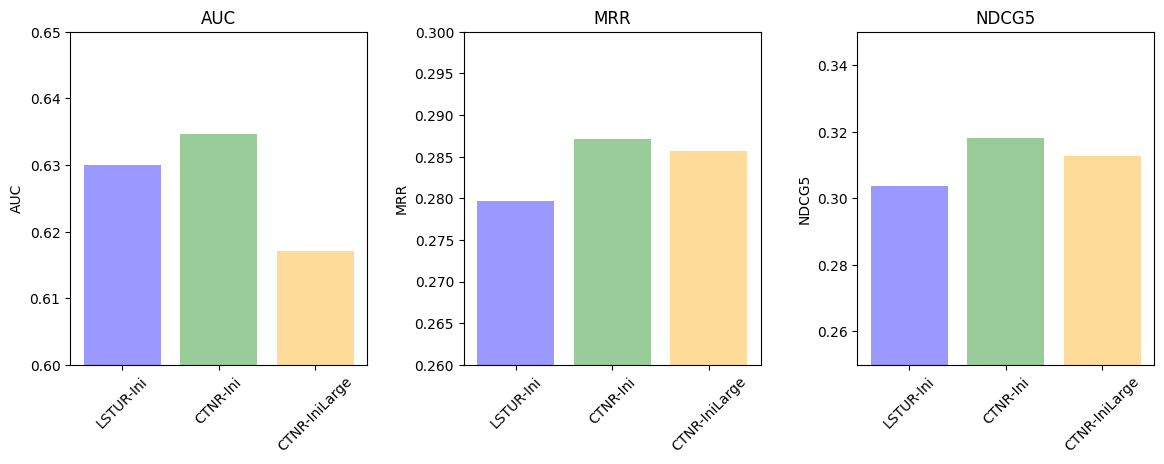

In [4]:
# Make a Bar plot of the scores

# Make a dataframe
df = pd.DataFrame(EndScores)

# Make a bar plot
fig, ax  = plt.subplots(1,3,figsize=(12,5))

Metrics = ['AUC', 'MRR', 'NDCG5'] #, 'NDCG10']
Intervals = [[0.6,0.65],[0.26,0.30],[0.25,0.35]] #,[0.20,0.40]]
Label_names = ['']

for idx,(metric,interval) in enumerate(zip(Metrics,Intervals)):

    # Plot AUC
    ax[idx].bar(df.index, df[metric], label=metric, color= ['blue','green', 'orange'])

    # set alpha value to 0.5 for all bars
    for i in range(len(df)):
        ax[idx].get_children()[i].set_alpha(0.4)

    # Angle the x-ticks
    ax[idx].tick_params(axis='x', rotation=45)

    # Set the x-axis tick labels
    ax[idx].set_xticklabels(['LSTUR-Ini','CTNR-Ini','CTNR-IniLarge'])


    # Set the y-axis limits
    ax[idx].set_ylim(interval)

    # Set the subtitle
    ax[idx].set_title(metric)

    # Set the y-axis label
    ax[idx].set_ylabel(metric)

fig.tight_layout(pad=2.0)




In [34]:
df

,AUC,MRR,NDCG5,NDCG10
LSTUR,0.6300,0.2797,0.3036,0.3727
TransformerIni,0.6346,0.2871,0.3182,0.3800
TransformerIniOwn,0.6171,0.2857,0.3127,0.3756
